In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
customers = pd.read_csv("C:/Users/Naga/OneDrive/Desktop/intern/Customers.csv")
products = pd.read_csv("C:/Users/Naga/OneDrive/Desktop/intern/Products.csv")
transactions = pd.read_csv("C:/Users/Naga/OneDrive/Desktop/intern/Transactions.csv")

In [33]:
print("Customers Data:")
print(customers.info(), "\n")
print(customers.head(), "\n")

print("Products Data:")
print(products.info(), "\n")
print(products.head(), "\n")

print("Transactions Data:")
print(transactions.info(), "\n")
print(transactions.head(), "\n")

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID   

In [34]:
print("Missing values:\n", customers.isnull().sum(), "\n")
print(products.isnull().sum(), "\n")
print(transactions.isnull().sum(), "\n")

Missing values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [35]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [36]:
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())

Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [37]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

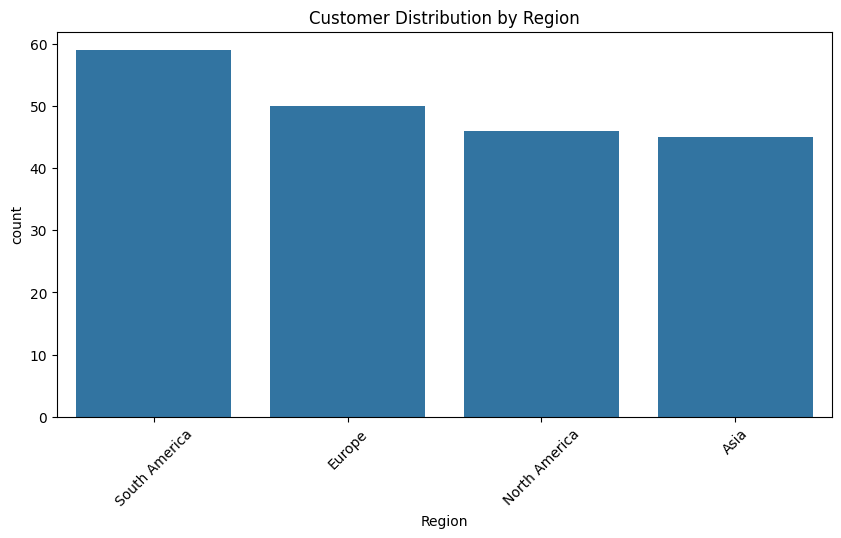

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title("Customer Distribution by Region")
plt.xticks(rotation=45)
plt.savefig("customer_distribution.png")
plt.show()

In [39]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10).reset_index()
top_products = top_products.merge(products, on='ProductID')

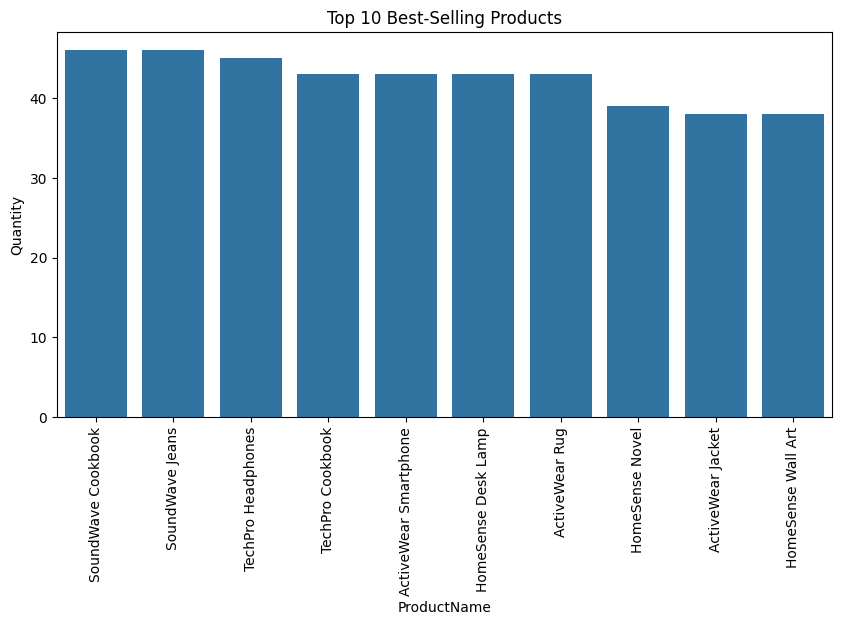

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_products, x='ProductName', y='Quantity')
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=90)
plt.savefig("top_products.png")
plt.show()

In [ ]:
Bussiness Insights:

Regional Distribution: Customers are unevenly distributed across different continents, with some regions contributing more to sales.

Best-Selling Products: The top 10 products generate a significant portion of total revenue, indicating high demand for a few key items.

Seasonal Trends: Monthly revenue trends suggest seasonal variations, which can help in inventory and marketing planning.

Customer Engagement: A small number of customers contribute to a large portion of transactions, suggesting the presence of loyal buyers.

Price Sensitivity: The price distribution shows that most products fall within a certain price range, which can influence pricing strategies.